In [1]:
import numpy as np
import cv2
import os
import random
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DIRECTORY = r'C:\Users\kenee\Desktop\ML PROJ\DCC\PetImages'
CATEGORIES = ['Cat','Dog']

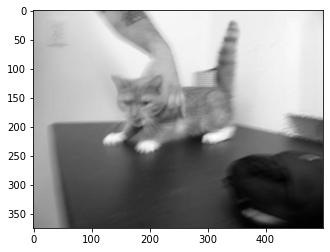

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DIRECTORY,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

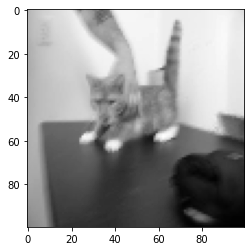

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

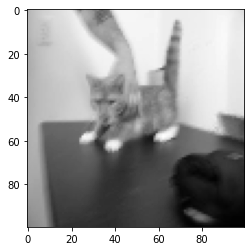

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DIRECTORY,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [02:51<00:00, 72.83it/s] 

24946


In [7]:
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
0
1
0
1


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 54]
   [ 54]
   [ 54]
   ...
   [ 97]
   [107]
   [131]]

  [[ 53]
   [ 53]
   [ 56]
   ...
   [103]
   [112]
   [119]]

  [[ 54]
   [ 54]
   [ 54]
   ...
   [102]
   [ 98]
   [123]]

  ...

  [[ 35]
   [ 37]
   [ 38]
   ...
   [ 72]
   [ 73]
   [ 66]]

  [[ 34]
   [ 35]
   [ 34]
   ...
   [ 68]
   [ 67]
   [ 64]]

  [[ 36]
   [ 34]
   [ 32]
   ...
   [ 68]
   [ 65]
   [ 72]]]]


In [10]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()